# Multi-Label Image Classification on Movies Poster using CNN

Watch Full Video Here: https://youtu.be/Vh26kOCra-Y

![alt text](https://miro.medium.com/max/1366/1*3urmp9yuK1Ys39UO5j41kg.png)

![alt text](https://www.microsoft.com/en-us/research/uploads/prod/2017/12/40250.jpg)

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 74kB/s 
     |████████████████████████████████| 4.3MB 41.2MB/s 
     |████████████████████████████████| 501kB 46.6MB/s 


Movie Poster Link: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [0]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [5]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [8]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7868, done.
remote: Counting objects: 100% (7868/7868), done.
remote: Compressing objects: 100% (7868/7868), done.
remote: Total 7868 (delta 0), reused 7868 (delta 0), pack-reused 0
Receiving objects: 100% (7868/7868), 246.26 MiB | 57.72 MiB/s, done.
Checking out files: 100% (7868/7868), done.


In [9]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [10]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:33<00:00, 216.79it/s]


In [12]:
X.shape

(7254, 350, 350, 3)

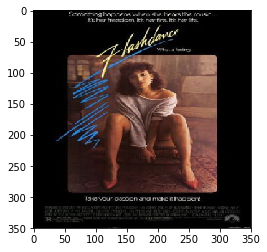

In [13]:
plt.imshow(X[1])

In [14]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [15]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [17]:
X_train[0].shape

(350, 350, 3)

## Build CNN 

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5


W0904 17:18:25.756936 140084605011840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


6165/6165 [==============================] - 720s 117ms/sample - loss: 0.6999 - accuracy: 0.6431 - val_loss: 0.5697 - val_accuracy: 0.7450
Epoch 2/5
6165/6165 [==============================] - 721s 117ms/sample - loss: 0.3138 - accuracy: 0.8869 - val_loss: 0.2531 - val_accuracy: 0.9071
Epoch 3/5
6165/6165 [==============================] - 718s 116ms/sample - loss: 0.2615 - accuracy: 0.9057 - val_loss: 0.2407 - val_accuracy: 0.9078
Epoch 4/5
6165/6165 [==============================] - 720s 117ms/sample - loss: 0.2525 - accuracy: 0.9085 - val_loss: 0.2388 - val_accuracy: 0.9096
Epoch 5/5
6165/6165 [==============================] - 723s 117ms/sample - loss: 0.2468 - accuracy: 0.9100 - val_loss: 0.2362 - val_accuracy: 0.9119


In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

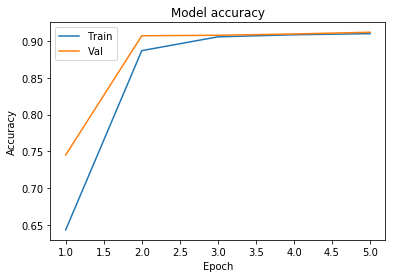

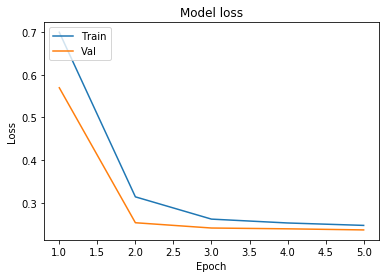

In [25]:
plot_learningCurve(history, 5)

## Testing of model

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Action
Adventure


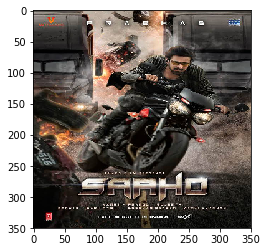

In [37]:
img = image.load_img('saaho.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [30]:
y_prob[0]

array([0.11832365, 0.18872917, 0.039664  , 0.02806863, 0.20426753,
       0.06428206, 0.13848737, 0.40880376, 0.04646528, 0.0976865 ,
       0.01097408, 0.07560191, 0.02231383, 0.00167122, 0.0243533 ,
       0.00247979, 0.00103101, 0.00124398, 0.07712758, 0.05736524,
       0.00555882, 0.0045439 , 0.07255542, 0.00812295, 0.00205181],
      dtype=float32)